In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.7a17'

In [4]:
from typing import List

from InvestmentResearch.collector.tdx.definition import TdxExchangeEnum, TdxPeriodEnum, ResultTypeEnum
from InvestmentResearch.collector.tdx.tdx_quote import read_quote

exchange = TdxExchangeEnum.SSE
period = TdxPeriodEnum.Day
symbol = '600036'

columns: List[str] = [
    'date', 'open', 'high', 'low', 'close', 'amount', 'volume'
] if period == TdxPeriodEnum.Day else [
    'date', 'time', 'open', 'high', 'low', 'close', 'amount', 'volume'
]
df = pd.DataFrame(
    read_quote(
        exchange=exchange,
        symbol=symbol,
        period=period,
        result_type=ResultTypeEnum.Tuple),
    columns=columns,
)

# 转换成 DatetimeIndex
df['date'] = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

# 显示结果
df.tail(10)

,open,high,low,close,amount,volume
date,,,,,,
2021-06-11,56.41,56.75,55.08,56.33,3.798816e+09,68208900
2021-06-15,55.83,55.83,54.12,54.80,2.899484e+09,52924052
2021-06-16,54.80,56.36,54.50,55.60,2.879682e+09,51877228
2021-06-17,55.52,56.00,54.86,55.12,1.765864e+09,31901934
2021-06-18,54.75,55.70,54.07,54.69,2.337303e+09,42711681
2021-06-21,54.30,54.79,53.12,53.69,3.119640e+09,57971550
2021-06-22,53.86,55.58,53.86,55.46,3.544467e+09,64359218
2021-06-23,55.38,55.47,54.48,54.82,2.243393e+09,40871965
2021-06-24,54.82,55.10,54.13,55.00,1.988185e+09,36360389


In [5]:
# DataFrame 转换成 DatetimeIndex
# index=pd.date_range(data.iloc[0, 0], data.iloc[-1, 0], freq='1D')
# type(index)

# data['date_index'] = pd.to_datetime(data.date)
# data.set_index('date_index', inplace=True)

In [6]:
mpf_color = mpf.make_marketcolors(
    up='red',  # 上涨K线的颜色
    down='green',  # 下跌K线的颜色
    inherit=True
)
mpf_style = mpf.make_mpf_style(
    marketcolors=mpf_color,
    rc={
        'font.family': 'SimHei',       # 指定默认字体：解决plot不能显示中文问题
        'axes.unicode_minus': False,  # 解决保存图像是负号'-'显示为方块的问题
    }
)

# 预备
df_plot_prepare = df.loc['2019-01-01':'2021-06-25', :]

# 计算瀑布线
df_plot_prepare['PBX4'] = (df['close'].ewm(span=4, adjust=False).mean()+df['close'].rolling(4*2).mean()+df['close'].rolling(4*4).mean())/3
df_plot_prepare['PBX6'] = (df['close'].ewm(span=6, adjust=False).mean()+df['close'].rolling(6*2).mean()+df['close'].rolling(6*4).mean())/3
df_plot_prepare['PBX24'] = (df['close'].ewm(span=24, adjust=False).mean()+df['close'].rolling(24*2).mean()+df['close'].rolling(24*4).mean())/3

df_plot_prepare.tail(10)

<ipython-input-6-180221687d91>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_prepare['PBX4'] = (df['close'].ewm(span=4, adjust=False).mean()+df['close'].rolling(4*2).mean()+df['close'].rolling(4*4).mean())/3
<ipython-input-6-180221687d91>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_prepare['PBX6'] = (df['close'].ewm(span=6, adjust=False).mean()+df['close'].rolling(6*2).mean()+df['close'].rolling(6*4).mean())/3
<ipython-input-6-180221687d91>:20: SettingWithCopyWarning: 
A value is t

,open,high,low,close,amount,volume,PBX4,PBX6,PBX24
date,,,,,,,,,
2021-06-11,56.41,56.75,55.08,56.33,3.798816e+09,68208900,56.726719,56.657452,54.380499
2021-06-15,55.83,55.83,54.12,54.80,2.899484e+09,52924052,56.399240,56.410283,54.384303
2021-06-16,54.80,56.36,54.50,55.60,2.879682e+09,51877228,56.373627,56.308873,54.421291
2021-06-17,55.52,56.00,54.86,55.12,1.765864e+09,31901934,56.141218,56.170703,54.441318
2021-06-18,54.75,55.70,54.07,54.69,2.337303e+09,42711681,55.859439,55.994728,54.447731
2021-06-21,54.30,54.79,53.12,53.69,3.119640e+09,57971550,55.448247,55.694369,54.422469
2021-06-22,53.86,55.58,53.86,55.46,3.544467e+09,64359218,55.460615,55.715442,54.467312
2021-06-23,55.38,55.47,54.48,54.82,2.243393e+09,40871965,55.311994,55.615673,54.489666
2021-06-24,54.82,55.10,54.13,55.00,1.988185e+09,36360389,55.222613,55.553040,54.519168


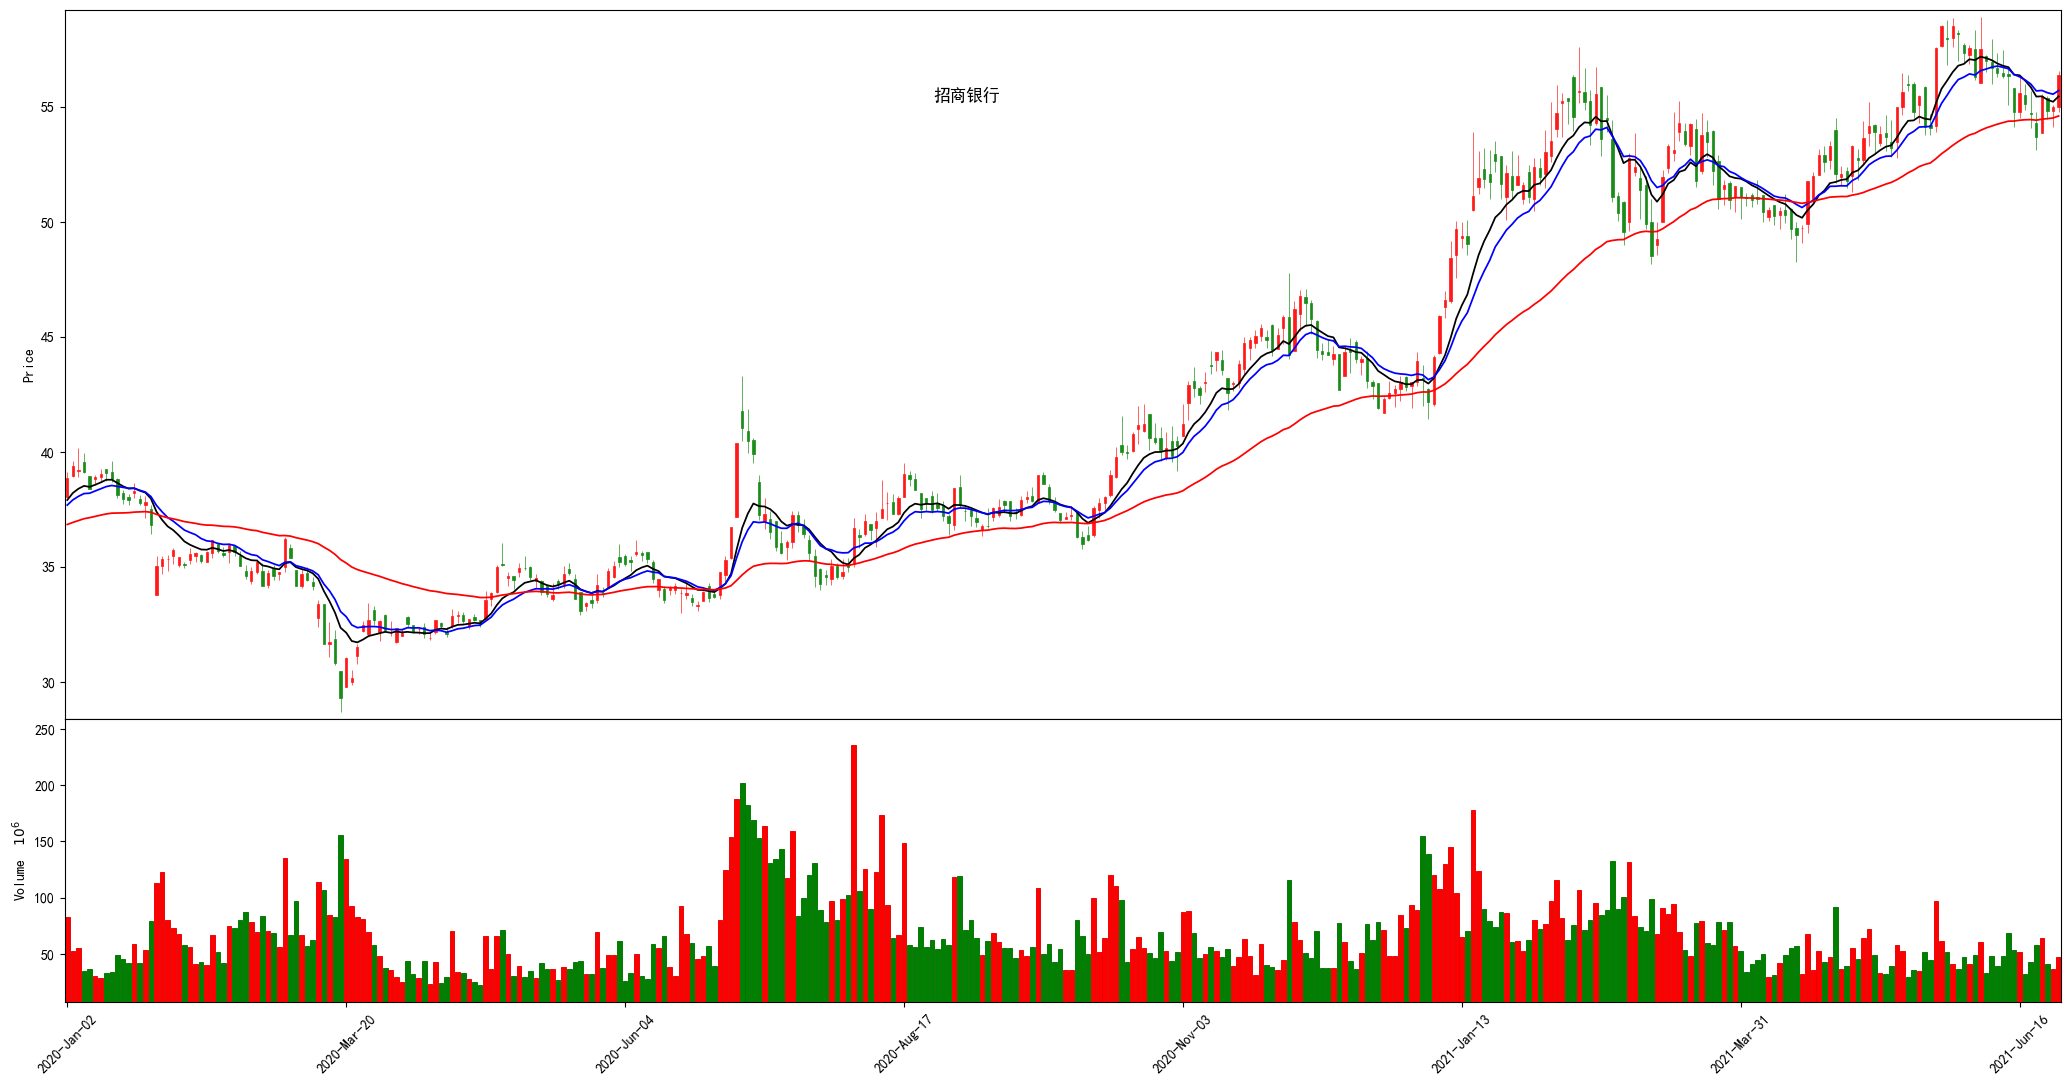

In [7]:
# 画图数据
df_plot = df_plot_prepare.loc['2020-01-01':'2021-06-25', :]

# 添加瀑布线
pbx = [
    mpf.make_addplot(df_plot['PBX4'], color='k'),
    mpf.make_addplot(df_plot['PBX6'], color='b'),
    mpf.make_addplot(df_plot['PBX24'], color='r')
]

# 画图
mpf.plot(
    df_plot,
    addplot=pbx,
    title='招商银行',
    type='candle',
    volume=True,
    show_nontrading=False,
    # mav=(5, 10, 20, 60, 120, 240),
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True
)